In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 1,
                                                   stratify=y,
                                                   test_size=0.25)
classifier = LinearSVC(random_state=1).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print "Accuracy: {}".format(classifier.score(X_test, y_test))

Accuracy: 0.953333333333


In [3]:
# For multi-class problems, it can be interesting to know which classes are hardest
# to predict, which are easy, and which get confused. One way is with a confusion_matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 41,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 43,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 42,  1,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 43]])

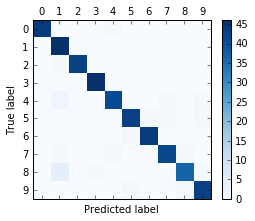

In [4]:
# A plot can sometimes be more readable

plt.matshow(confusion_matrix(y_test, y_test_pred), cmap='Blues')
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        45
          1       0.85      1.00      0.92        46
          2       1.00      0.98      0.99        44
          3       0.98      1.00      0.99        46
          4       0.95      0.91      0.93        45
          5       0.96      0.93      0.95        46
          6       0.98      0.98      0.98        45
          7       0.95      0.93      0.94        45
          8       0.95      0.86      0.90        43
          9       0.93      0.96      0.95        45

avg / total       0.96      0.95      0.95       450



In [6]:
np.bincount(y) / y.shape[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
X, y = digits.data, digits.target == 3

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

cross_val_score(SVC(), X, y)

array([ 0.9,  0.9,  0.9])

In [9]:
from sklearn.dummy import DummyClassifier
cross_val_score(DummyClassifier("most_frequent"), X, y)

array([ 0.9,  0.9,  0.9])

In [10]:
np.bincount(y) / y.shape[0]

array([0, 0])

//anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


ValueError: bad input shape (450, 45)

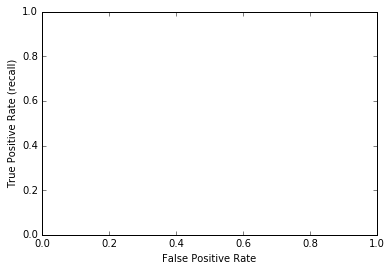

In [11]:
# ROC Curves
# A better measure is using ROC (Receiver Operating Characteristics) curves
# A roc-curve works with uncertainty outputs of a classifier
# The following plot compares the roc curve of three parameter settings of
# the classifier on the "Three vs Rest" task

from sklearn.metrics import roc_curve, roc_auc_score

for gamma in [.01, .05, .1]:
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (recall)')
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label='acc:%.2f auc:%.2f' % (acc, auc), linewidth=3)
plt.legend(loc='best')

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), X, y, scoring="roc_auc")

array([ 1.,  1.,  1.])